In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
# %matplotlib notebook

In [2]:
data = pd.read_csv('finally.dat',sep="\s+",usecols = [0,1,5,8,9])
def find(a,b):
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])
def find_plate(a,b):
    a = 270 + a/2
    b = 28 +b/2
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])
def find_pol(a,b):
    a = 270 + a/2
    b = 28 +b/2
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])

In [133]:
def pvv(a,b,theta,phi):
    a = a/180*np.pi
    b = b/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
def pvv_f(ab,theta,phi):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
    

In [8]:
def unentangled(a,b,theta,phi):
    a = a/180*np.pi
    b = b/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(1/2*(np.cos(b)*np.cos(a)+np.sin(a)*np.sin(b)-np.cos(b)*np.sin(a)-np.sin(b)*np.cos(a))**2)
    

In [35]:
angles = np.linspace(0,360,100)
a = 0

In [36]:
ent = pvv(a,angles,45,0)
unent = unentangled(a,angles,0,0)
angles  = angles/180*np.pi
entt = 1/2*np.cos(angles)**2

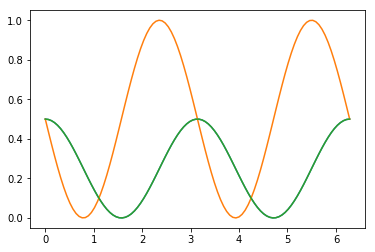

In [37]:
plt.plot(angles,ent)
plt.plot(angles,unent)
plt.plot(angles,entt)

In [38]:
find_plate(45,45)

,A,B,AB,HWP_A,HWP_B
66,57321.2,106433.53,478.92,292.5,50.5


In [39]:
alphas = np.unique(data['HWP_A'].values)
betas = np.unique(data['HWP_B'].values)

In [40]:
alphas[1:]

array([236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75, 315.  ])

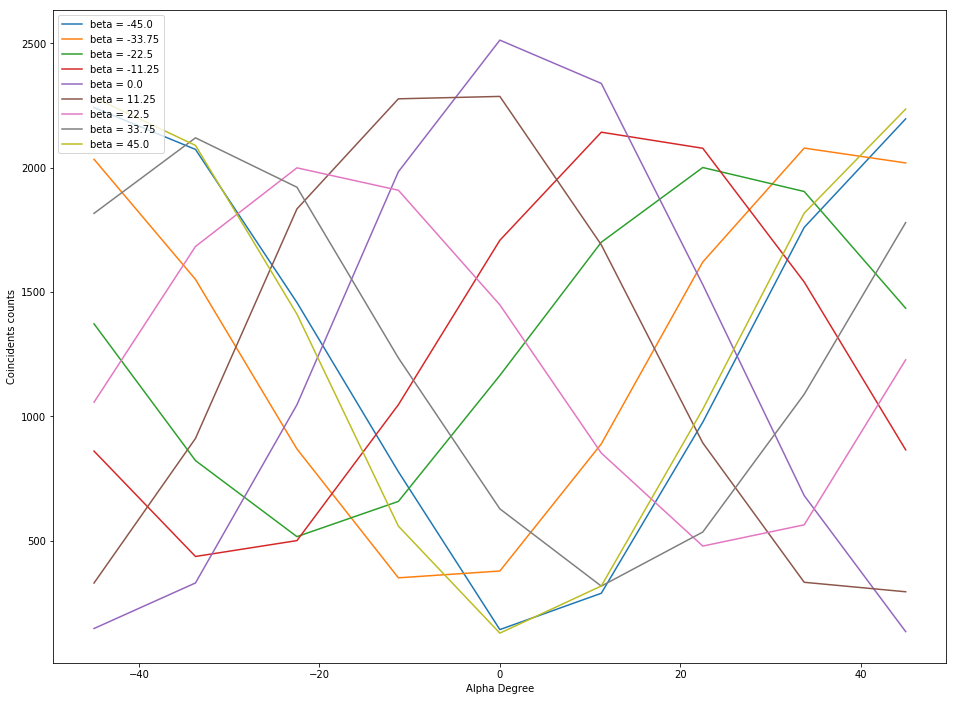

In [41]:
fig, ax = plt.subplots(figsize = (16,12))

for b in betas:    
    counts = []
    for i in alphas: 
        counts += [find(i,b)['AB'].values[0]]
    ax.plot(np.array(alphas)-270,counts, label = 'beta = {}'.format(b-28))
ax.set_xlabel('Alpha Degree')
ax.set_ylabel('Coincidents counts')
plt.legend()

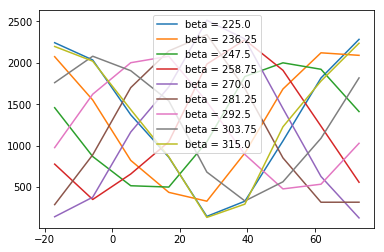

In [42]:
for a in alphas:    
    counts = []
    for b in betas:
        counts += [find(a,b)['AB'].values[0]]
    plt.plot(betas,counts, label = 'beta = {}'.format(a))
    
plt.legend()

Taking alpha as fixed and beta as mobile, we find the contrast of our measurement:

In [153]:
counts = []
b = 28
for i in alphas:
    counts += [find(i,b)['AB'].values[0]]

In [154]:
(max(counts)-min(counts))/(max(counts)+min(counts))

0.8980683899473197

In [155]:
counts = []
b = 28+45
for i in alphas:
    counts += [find(i,b)['AB'].values[0]]

In [156]:
(max(counts)-min(counts))/(max(counts)+min(counts))

0.8931527526664124

In [157]:
b

73

In [48]:
counts

[2282.65, 2089.83, 1411.43, 559.05, 128.83, 318.36, 1029.0, 1817.39, 2235.88]

In [121]:
count = {}
for b in betas:    
    counts = []
    for i in alphas: 
        counts += [find(i,b)['AB'].values[0]]
        count[i-270,b-28] = find(i,b)['AB'].values[0]



In [125]:
def prob(a,b):
    
    if (a>0) & (b>0):
        a_p = a-45
        b_p = b-45
    elif (a>0) & (b<=0):
        a_p = a-45
        b_p = b+45
    elif (a<=0) & (b>0):
        a_p = a+45
        b_p = b-45
    elif (a<=0) & (b<=0):
        a_p = 45+a
        b_p = 45+b
    if (int(100*a)%1125==0)&(int(100*b)%1125==0):
        count_vv = count[(a,b)]
        count_hv = count[(a_p,b)]
        count_vh = count[(a,b_p)]
        count_hh = count[(a_p,b_p)]
    return(count_vv/(count_vv+count_hv+count_vh+count_hh))    
        

In [127]:
prob(0,45)

0.0257004125471796

In [53]:
angles = np.array(alphas)-270

In [54]:
angles

array([-45.  , -33.75, -22.5 , -11.25,   0.  ,  11.25,  22.5 ,  33.75,
        45.  ])

In [128]:
for i in angles:
    print(prob(i,-i))

0.45004396635686483
0.4225144421705402
0.40021896466142537
0.4517520279800743
0.5013385839338009
0.42702394640405394
0.400481161833699
0.41244026162877206
0.4403938457096802


In [56]:
def E(a,b):
    return(np.cos(a-b)**2-np.sin(a-b)**2)

In [57]:
def S(a,b,ap,bp):
    return(E(a,b)-E(a,bp)+E(ap,b)+E(ap,bp))

In [58]:
S(0,22.5,22.5,225)

1.2905010158242431

In [64]:
a = 50/180*np.pi
ap = (a-45)/180*np.pi
b = (a-22.5)/180*np.pi
bp = (ap+22.5)/180*np.pi

S(ap,b,a,bp)

1.1225711652769403

In [76]:
a = 0
ap = (a-45)/180*np.pi
b = (a-22.5)/180*np.pi
bp = (ap-22.5)/180*np.pi
a = a/180*np.pi

S(a,b,ap,bp)

1.452980173472547

In [16]:
2*np.sqrt(2)

2.8284271247461903

In [18]:
np.cos(ap)

0.7071067811865476

In [24]:
E(ap,bp)

-0.6874577568299054

In [34]:
a = 0
ap = (a+45)/180*np.pi
b = (a+22.5)/180*np.pi
bp = (ap-22.5)/180*np.pi

S(ap,b,a,bp)

2.827895687132358

In [81]:
x = alphas
y = betas
X, Y = np.meshgrid(x, y)

In [82]:
X

array([[225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ]])

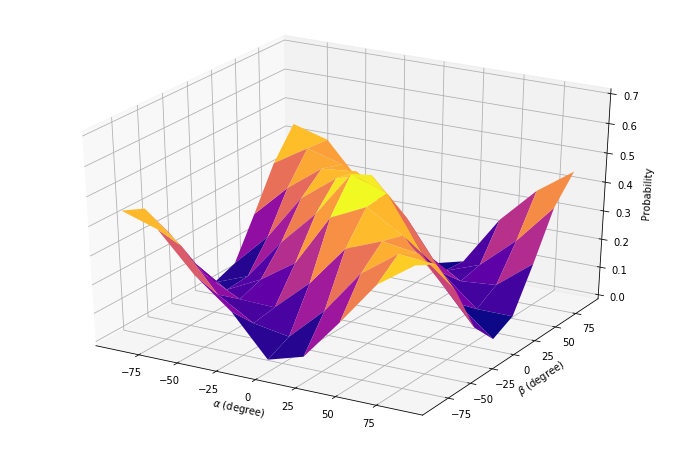

Fitted parameters:
[ 46.41649347 128.47081446]
RMS residual = 0.04094768131395964


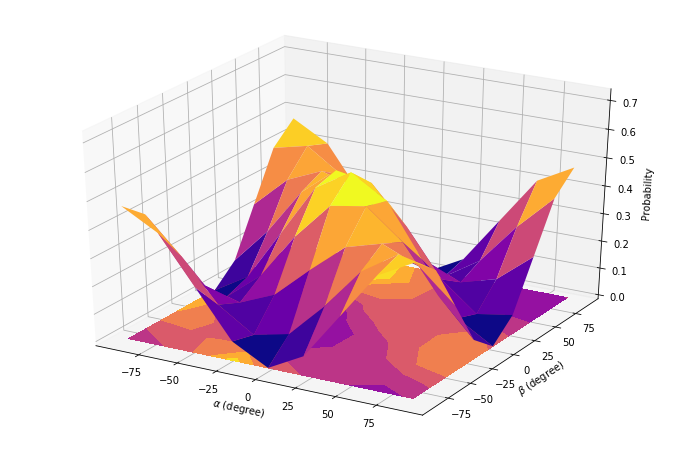

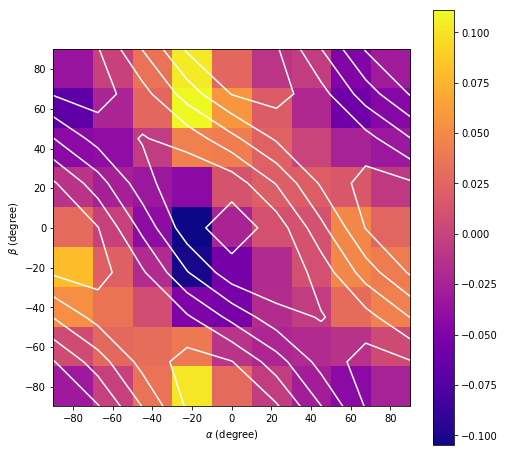

In [167]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The two-dimensional domain of the fit.
# xmin, xmax, nx = -5, 4, 75
# ymin, ymax, ny = -3, 7, 150
# x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
x = 2*(alphas-270)
y = 2*(betas-28)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def pvv(a,b,theta,phi):
    a = a/180*np.pi
    b = b/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
def pvv_f(ab,theta,phi):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return (np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))

Z = np.zeros(X.shape).tolist()

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        Z[i][j] = find(a,b)['AB'].values[0]
Z = np.array(Z)

ZZ = np.zeros(X.shape).tolist()
for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        ZZ[i][j] = prob(a-270,b-28)
ZZ = np.array(ZZ)
# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# noise_sigma = 0.1

# The function to be fit is Z.
# Z = np.zeros(X.shape)
# for p in gprms:
#     Z += gaussian(X, Y, *p)
# Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')
ax.plot_surface((X),( Y), ZZ, cmap='plasma')
ax.set_zlim(0,np.max(ZZ)+0.2)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

# # This is the callable that is passed to curve_fit. M is a (2,N) array
# # where N is the total number of data points in Z, which will be ravelled
# # to one dimension.
# def _gaussian(M, *args):
#     x, y = M
#     arr = np.zeros(x.shape)
#     for i in range(len(args)//5):
#        arr += gaussian(x, y, *args[i*5:i*5+5])
#     return arr

# # Initial guesses to the fit parameters.
# guess_prms = [(0, 0, 1, 1, 2),
#               (-1.5, 5, 5, 1, 3),
#               (-4, -1, 1.5, 1.5, 6),
#               (4, 1, 1.5, 1.5, 6.5)
#              ]
# # Flatten the initial guess parameter list.
# p0 = [p for prms in guess_prms for p in prms]

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = (np.vstack((X.ravel(), Y.ravel())))
Z = ZZ
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(pvv_f, xdata, ZZ.ravel(),p0 = [45,72])
fit = np.zeros(ZZ.shape)
for i in range(len(popt)//2):
    fit += pvv(X, Y, *popt)
print('Fitted parameters:')
print(popt)

rms = np.sqrt(np.mean((ZZ - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fit, cmap='plasma')
cset = ax.contourf(X, Y, ZZ-fit, zdir='z', offset=0, cmap='plasma')
ax.set_zlim(0,np.max(fit)+0.2)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

# Plot the test data as a 2D image and the fit as overlaid contours.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
heatmap = ax.imshow(Z-fit, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(heatmap)
ax.contour(X, Y, fit, colors='w')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

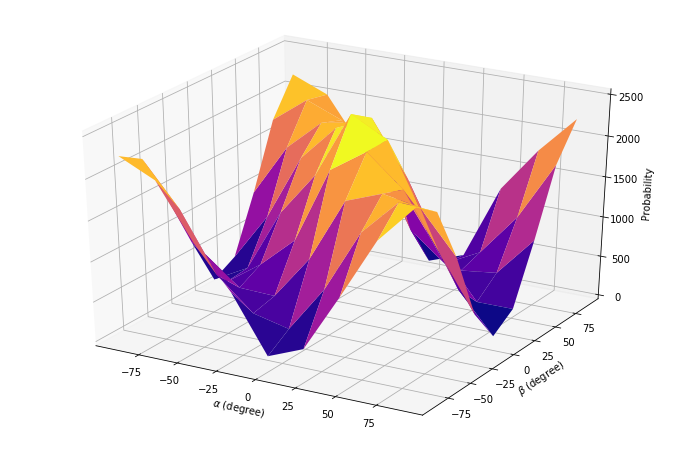

Fitted parameters:
[2.29802155e+02 6.48412458e-01 6.74447616e-01 5.54770475e+03]
RMS residual = 200.49484527863513


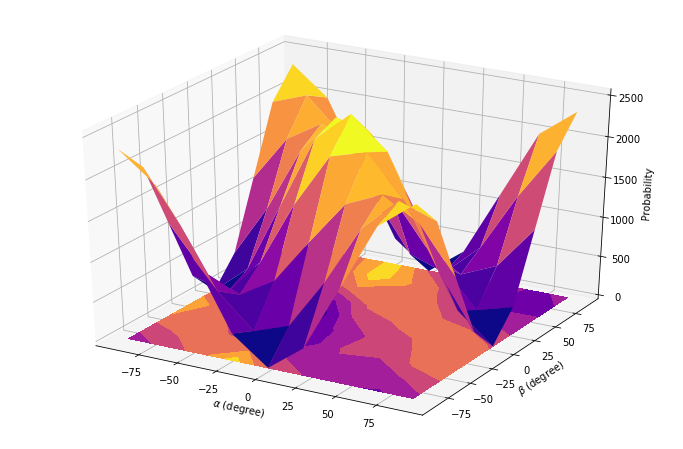

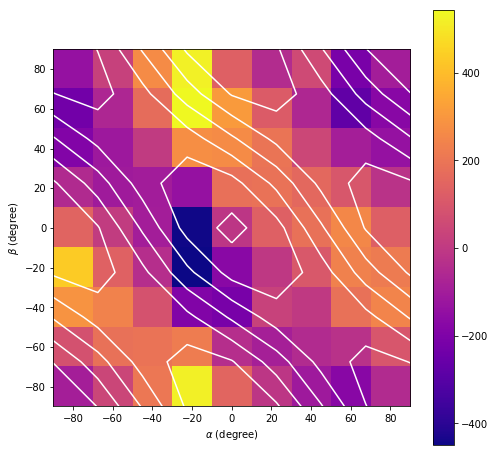

In [184]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The two-dimensional domain of the fit.
# xmin, xmax, nx = -5, 4, 75
# ymin, ymax, ny = -3, 7, 150
# x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
x = 2*(alphas-270)
y = 2*(betas-28)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def pvv_f(ab,phi,c1,c2,A):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
#     theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return A*(np.sin(a)**2*np.sin(b)**2*c1**2+np.cos(a)**2*np.cos(b)**2*c2**2
          +1/2*np.sin(2*a)*np.sin(2*b)*c1*c2*np.cos(phi))

Z = np.zeros(X.shape).tolist()

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        Z[i][j] = find(a,b)['AB'].values[0]
Z = np.array(Z)

# ZZ = np.zeros(X.shape).tolist()
# for i, a in enumerate(alphas):
#     for j, b in enumerate(betas):
#         ZZ[i][j] = prob(a-270,b-28)
# ZZ = np.array(ZZ)
ZZ = Z
# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# noise_sigma = 0.1

# The function to be fit is Z.
# Z = np.zeros(X.shape)
# for p in gprms:
#     Z += gaussian(X, Y, *p)
# Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')
ax.plot_surface((X),( Y), ZZ, cmap='plasma')
ax.set_zlim(0,np.max(ZZ)+0.2)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

# # This is the callable that is passed to curve_fit. M is a (2,N) array
# # where N is the total number of data points in Z, which will be ravelled
# # to one dimension.
# def _gaussian(M, *args):
#     x, y = M
#     arr = np.zeros(x.shape)
#     for i in range(len(args)//5):
#        arr += gaussian(x, y, *args[i*5:i*5+5])
#     return arr

# # Initial guesses to the fit parameters.
# guess_prms = [(0, 0, 1, 1, 2),
#               (-1.5, 5, 5, 1, 3),
#               (-4, -1, 1.5, 1.5, 6),
#               (4, 1, 1.5, 1.5, 6.5)
#              ]
# # Flatten the initial guess parameter list.
# p0 = [p for prms in guess_prms for p in prms]

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = (np.vstack((X.ravel(), Y.ravel())))
Z = ZZ
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(pvv_f, xdata, ZZ.ravel(),p0 = [128.47081446,0.2,0.2,1000])
fit = np.zeros(ZZ.shape)
fit += pvv_f([X, Y], *popt)
print('Fitted parameters:')
print(popt)

rms = np.sqrt(np.mean((ZZ - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fit, cmap='plasma')
cset = ax.contourf(X, Y, ZZ-fit, zdir='z', offset=0, cmap='plasma')
ax.set_zlim(0,np.max(fit)+0.2)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

# Plot the test data as a 2D image and the fit as overlaid contours.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
heatmap = ax.imshow(Z-fit, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(heatmap)
ax.contour(X, Y, fit, colors='w')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

In [178]:
pvv_f([0,0],*popt)

2523.5422854020244

In [180]:
find(0+270,0+28)

,A,B,AB,HWP_A,HWP_B
50,57230.8,105035.73,2513.09,270.0,28.0


In [83]:
np.shape(X)

(9, 9)

In [88]:
Z = np.zeros(X.shape).tolist()
# Z = list(Z)

In [97]:
Z = np.zeros(X.shape).tolist()

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        Z[i][j] = find(a,b)['AB'].values[0]

In [98]:
Z

[[2241.99, 2034.04, 1372.39, 860.7, 147.49, 330.43, 1057.32, 1816.61, 2282.65],
 [2073.68, 1551.13, 822.67, 437.08, 330.68, 911.81, 1683.46, 2120.3, 2089.83],
 [1458.21, 869.31, 516.83, 500.9, 1047.15, 1834.47, 1999.59, 1921.69, 1411.43],
 [777.7, 351.26, 658.52, 1047.36, 1984.08, 2277.16, 1909.58, 1235.29, 559.05],
 [143.12, 378.61, 1164.98, 1708.29, 2513.09, 2286.78, 1448.81, 628.59, 128.83],
 [289.19, 889.75, 1700.56, 2142.93, 2339.0, 1690.01, 852.83, 317.98, 318.36],
 [976.79, 1620.96, 2000.9, 2078.37, 1530.25, 893.9, 478.92, 535.29, 1029.0],
 [1760.29, 2079.0, 1904.49, 1540.6, 681.88, 333.31, 564.35, 1089.3, 1817.39],
 [2196.57, 2019.41, 1435.13, 865.75, 134.96, 295.21, 1227.8, 1779.49, 2235.88]]

In [105]:
 Z.ravel()

array([2241.99, 2034.04, 1372.39,  860.7 ,  147.49,  330.43, 1057.32,
       1816.61, 2282.65, 2073.68, 1551.13,  822.67,  437.08,  330.68,
        911.81, 1683.46, 2120.3 , 2089.83, 1458.21,  869.31,  516.83,
        500.9 , 1047.15, 1834.47, 1999.59, 1921.69, 1411.43,  777.7 ,
        351.26,  658.52, 1047.36, 1984.08, 2277.16, 1909.58, 1235.29,
        559.05,  143.12,  378.61, 1164.98, 1708.29, 2513.09, 2286.78,
       1448.81,  628.59,  128.83,  289.19,  889.75, 1700.56, 2142.93,
       2339.  , 1690.01,  852.83,  317.98,  318.36,  976.79, 1620.96,
       2000.9 , 2078.37, 1530.25,  893.9 ,  478.92,  535.29, 1029.  ,
       1760.29, 2079.  , 1904.49, 1540.6 ,  681.88,  333.31,  564.35,
       1089.3 , 1817.39, 2196.57, 2019.41, 1435.13,  865.75,  134.96,
        295.21, 1227.8 , 1779.49, 2235.88])

In [106]:
Z

array([[2241.99, 2034.04, 1372.39,  860.7 ,  147.49,  330.43, 1057.32,
        1816.61, 2282.65],
       [2073.68, 1551.13,  822.67,  437.08,  330.68,  911.81, 1683.46,
        2120.3 , 2089.83],
       [1458.21,  869.31,  516.83,  500.9 , 1047.15, 1834.47, 1999.59,
        1921.69, 1411.43],
       [ 777.7 ,  351.26,  658.52, 1047.36, 1984.08, 2277.16, 1909.58,
        1235.29,  559.05],
       [ 143.12,  378.61, 1164.98, 1708.29, 2513.09, 2286.78, 1448.81,
         628.59,  128.83],
       [ 289.19,  889.75, 1700.56, 2142.93, 2339.  , 1690.01,  852.83,
         317.98,  318.36],
       [ 976.79, 1620.96, 2000.9 , 2078.37, 1530.25,  893.9 ,  478.92,
         535.29, 1029.  ],
       [1760.29, 2079.  , 1904.49, 1540.6 ,  681.88,  333.31,  564.35,
        1089.3 , 1817.39],
       [2196.57, 2019.41, 1435.13,  865.75,  134.96,  295.21, 1227.8 ,
        1779.49, 2235.88]])

In [107]:
X.ravel()

array([225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
       315.  , 225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 ,
       303.75, 315.  , 225.  , 236.25, 247.5 , 258.75, 270.  , 281.25,
       292.5 , 303.75, 315.  , 225.  , 236.25, 247.5 , 258.75, 270.  ,
       281.25, 292.5 , 303.75, 315.  , 225.  , 236.25, 247.5 , 258.75,
       270.  , 281.25, 292.5 , 303.75, 315.  , 225.  , 236.25, 247.5 ,
       258.75, 270.  , 281.25, 292.5 , 303.75, 315.  , 225.  , 236.25,
       247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75, 315.  , 225.  ,
       236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75, 315.  ,
       225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
       315.  ])

In [187]:
# def monte(n,ang_err = 2):
ang_err = 2
n = 1000
x = 2*(alphas-270)
y = 2*(betas-28)
X, Y = np.meshgrid(x, y)
angle_err = np.zeros(X.shape)
angle_err += ang_err

props = []

for i in range(n:)
    X =  
    # Our function to fit is going to be a sum of two-dimensional Gaussians
    def pvv_f(ab,phi,c1,c2,A):
        a = ab[0]/180*np.pi
        b = ab[1]/180*np.pi
    #     theta = theta/180*np.pi
        phi = phi/180*np.pi

        return A*(np.sin(a)**2*np.sin(b)**2*c1**2+np.cos(a)**2*np.cos(b)**2*c2**2
              +1/2*np.sin(2*a)*np.sin(2*b)*c1*c2*np.cos(phi))

    Z = np.zeros(X.shape).tolist()

    for i, a in enumerate(alphas):
        for j, b in enumerate(betas):
            Z[i][j] = find(a,b)['AB'].values[0]
    Z = np.array(Z)

    ZZ = Z

    # ax = fig.gca(projection='3d')
    # ax.plot_surface((X),( Y), ZZ, cmap='plasma')
    # ax.set_zlim(0,np.max(ZZ)+0.2)
    # ax.set_zlabel('Probability')
    # ax.set_xlabel(r'$\alpha$ (degree)')
    # ax.set_ylabel(r'$\beta$ (degree)')
    # plt.show()

    xdata = (np.vstack((X.ravel(), Y.ravel())))
    Z = ZZ
    # Do the fit, using our custom _gaussian function which understands our
    # flattened (ravelled) ordering of the data points.
    popt, pcov = curve_fit(pvv_f, xdata, ZZ.ravel(),p0 = [128.47081446,0.2,0.2,1000])
    fit = np.zeros(ZZ.shape)
    fit += pvv_f([X, Y], *popt)
    print('Fitted parameters:')
    print(popt)

    rms = np.sqrt(np.mean((ZZ - fit)**2))
    print('RMS residual =', rms)

    # Plot the 3D figure of the fitted function and the residuals.
    # fig = plt.figure(figsize=(12,8))
    # ax = fig.gca(projection='3d')
    # ax.plot_surface(X, Y, fit, cmap='plasma')
    # cset = ax.contourf(X, Y, ZZ-fit, zdir='z', offset=0, cmap='plasma')
    # ax.set_zlim(0,np.max(fit)+0.2)
    # ax.set_zlabel('Probability')
    # ax.set_xlabel(r'$\alpha$ (degree)')
    # ax.set_ylabel(r'$\beta$ (degree)')
    # plt.show()

    # Plot the test data as a 2D image and the fit as overlaid contours.
    # fig = plt.figure(figsize = (8,8))
    # ax = fig.add_subplot(111)
    # heatmap = ax.imshow(Z-fit, origin='bottom', cmap='plasma',
    #           extent=(x.min(), x.max(), y.min(), y.max()))
    # plt.colorbar(heatmap)
    # ax.contour(X, Y, fit, colors='w')
    # ax.set_xlabel(r'$\alpha$ (degree)')
    # ax.set_ylabel(r'$\beta$ (degree)')
    # plt.show()

Fitted parameters:
[2.29802155e+02 6.48412458e-01 6.74447616e-01 5.54770475e+03]
RMS residual = 200.49484527863513
